In [27]:
import numpy as np
import matplotlib.pyplot as plt

import data_gen


In [28]:
def e_greedy(user, n_steps, n_runs, n_movies, e):
    ''' user : The user object, encapsulating preference vector and step function
        n_steps : Number of steps to take
        n_runs : How many runs to take
        n_movies: How many movies to choose from (action space)
        e : How likely are we to make a random reconmendation (explore instead of exploit)
    Returns:
        avg_r : Average reward recieved over n_steps steps
        avg_op : Average % of times when agent picked optimal choice over n_steps step
    '''

    u_preference = user.preferences
    opt_choice = max(range(len(u_preference)), key=u_preference.__getitem__) # The best choice

    avg_r = np.array([0] * n_steps)
    avg_op = np.array([0] * n_steps)
    for run in range(n_runs):
        run_r = np.array([0] * n_steps)
        run_op = np.array([0] * n_steps)

        q_arr = [0] * n_movies # q value array
        count_arr = [0] * n_movies # How many times we picked each movie (to calc q)
        for step in range(n_steps):

            if np.random.uniform() < e:
                # Take random reconmendation
                choice = np.random.randint(0, n_movies)
            else:
                # Take greedy choice
                choice = max(range(len(q_arr)), key=q_arr.__getitem__)
            
            rating = user.recommend(choice)

            # Update q table
            count_arr[choice] += 1
            q_arr[choice] = (q_arr[choice] * (count_arr[choice] - 1) + rating) / count_arr[choice]

            # Update run statistics
            run_r[step] = rating
            if choice == opt_choice: run_op[step] = 1

        avg_r += run_r
        avg_op += run_op

    avg_r = np.divide(avg_r, n_runs)
    avg_op = np.divide(avg_op, n_runs)
    
    return avg_r, avg_op
    



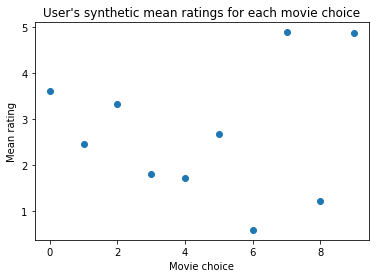

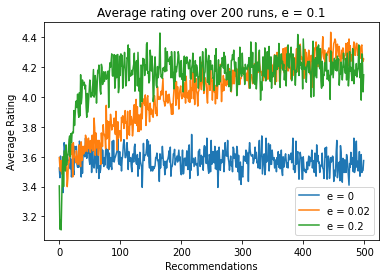

In [32]:
# Training and testing paremeters
n_movies = 10
n_steps = 500
n_runs = 200

# Generate random user preferences
user = data_gen.gen_user(n_movies, 1)

x = list(range(n_movies))
preferences = user.preferences
plt.scatter(x, preferences)
plt.xlabel('Movie choice')
plt.ylabel('Mean rating')
plt.title('User\'s synthetic mean ratings for each movie choice')
# Implement e-greedy algorhythm for e = 0, 0.02, 0.2
e_arr = [0, 0.02, 0.2]
avg_r_arr = list()
avg_op_arr = list()

for e in e_arr:
    avg_r, avg_op = e_greedy(user, n_steps, n_runs, n_movies, e)
    avg_r_arr.append(avg_r)
    avg_op_arr.append(avg_op)

x = list(range(n_steps))

plt.figure()
for i in range(len(e_arr)):
    plt.plot(x, avg_r_arr[i], label = "e = " + str(e_arr[i]) )

plt.xlabel('Recommendations')
plt.ylabel('Average Rating')
plt.title('Average rating over {s} runs, e = {e}'.format(s = n_runs, e = 0.1))
plt.legend()
plt.show()


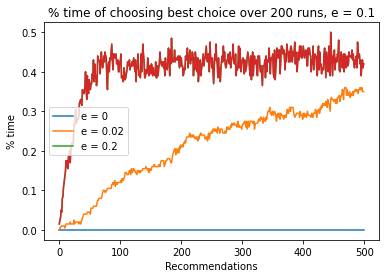

In [34]:

plt.figure()
for i in range(len(e_arr)):
    plt.plot(x, avg_op_arr[i], label = "e = " + str(e_arr[i]) )
    
plt.plot(list(range(n_steps)),avg_op)
plt.xlabel('Recommendations')
plt.ylabel('% time')
plt.title('% time of choosing best choice over {s} runs, e = {e}'.format(s = n_runs, e = 0.1))
plt.legend()
plt.show()